## Importing Libraries and Datasets

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

In [7]:
df_hist=pd.read_csv('ml_case_training_hist_data.csv')
df_main=pd.read_csv('ml_case_training_data.csv')
df_out=pd.read_csv('ml_case_training_output.csv')

The dataset ml_case_training_hist_data.csv named as pco_hist contains the history of energy and power consumption per client:

id: contact id 

price_date: reference date

price_p1_var: price of energy for the 1st period 

price_p2_var: price of energy for the 2nd period

price_p3_var: price of energy for the 3rd period 

price_p1_fix: price of power for the 1st period

price_p2_fix: price of power for the 2nd period

price_p3_fix: price of power for the 3rd period

In [8]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


The dataset ml_case_training_data.csv contains:

id: contact id

activity_new: category of the company's activity. 419 unique values, remove NaN

campaign_disc_elec: code of the electricity campaign the customer last subscribed to. 0 non-null

channel_sales: code of the sales channel

cons_12m: electricity consumption of the past 12 months

cons_gas_12m: gas consumption of the past 12 months

cons_last_month: electricity consupmtion of the last month

date_activ: date of activation of the contract

date_end: registered date of the end of the contract

date_first_activ: date of first contract of the client

date_modif_prod: date of last modification of the product

date_renewal: date of the next contract renewal

forecast_base_bill_ele: forecasted electricity bill baseline for next month

forecast_base_bill_year: forecasted electricity bill baseline for calendar year

forecast_bill_12m: forecasted electricity bill baseline for 12 months

forecast_cons: forecasted electricity consumption for next month

forecast_cons_12m: forecasted electricity consumption for next 12 months

forecast_cons_year: forecasted electricity consumption for next calendar year

forecast_discount_energy: forecasted value of current discount

forecast_meter_rent_12m: forecasted bill of meter rental for the next 12 months

forecast_price_energy_p1: forecasted energy price for 1st period

forecast_price_energy_p2: forecasted energy price for 2nd period

forecast_price_pow_p1: forecasted power price for 1st period

has_gas: indicated if client is also a gas client

imp_cons: current paid consumption

margin_gross_pow_ele: gross margin on power subscription

margin_net_pow_ele: net margin on power subscription

nb_prod_act: number of active products and services

net_margin: total net margin

num_years_antig: antiquity of the client (in number of years)

origin_up: code of the electricity campaign the customer first subscribed to

pow_max: subscribed power

In [16]:
df_main.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


id: contact id *churn: has the client churned over the next 3 months



In [15]:
df_out.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## Exploration

In [25]:
print('Attrition rates:\n',df_out['churn'].value_counts()/df_out['churn'].value_counts().sum()*100)

Attrition rates:
 0    90.090706
1     9.909294
Name: churn, dtype: float64


___________________________________________________________________________
### Observations
>* Customer retention is 90 % in last 3 months
>* Customer attrition is 10 % in last 3 months

In [26]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 10.3+ MB


In [27]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [28]:
df_hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

___________________________________________________________________________
### Observations
#### Energy
> Average price for 1st period was 0.14

> Average price for 1st period was 0.03

> Average price for 1st period was 0.03

#### Power
>* Average price for 1st period was 43.32

>* Average price for 1st period was 10.69

>* Average price for 1st period was 6.45
#### The average prices of both Energy and Power is declining
----------------------------------------------------------------------------
There are many negative values present because price cannot be negative,
Lot of rows has null values,
some of the columns has min value of 0 which is not possible


In [35]:
df_main.isnull().mean()*100

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [31]:
df_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


___________________________________________________________________________
### Observations
>The average tenure of a client is 5 years

>The average net marging is 217

>Many columns contains negative values.

> Lot of null values i.e empty data is present

## Data Cleaning and Imputation


<AxesSubplot:>

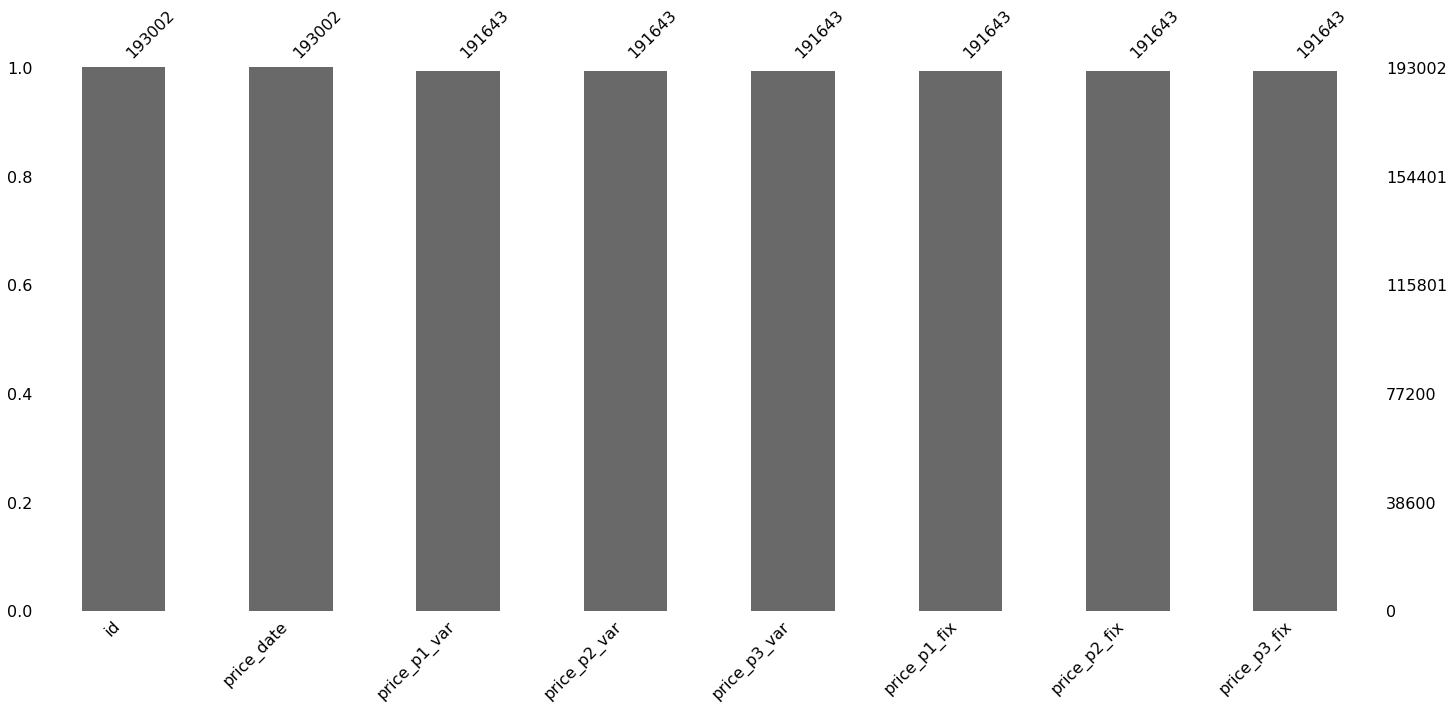

In [36]:
msno.bar(df_hist)

Values at top are different

<AxesSubplot:>

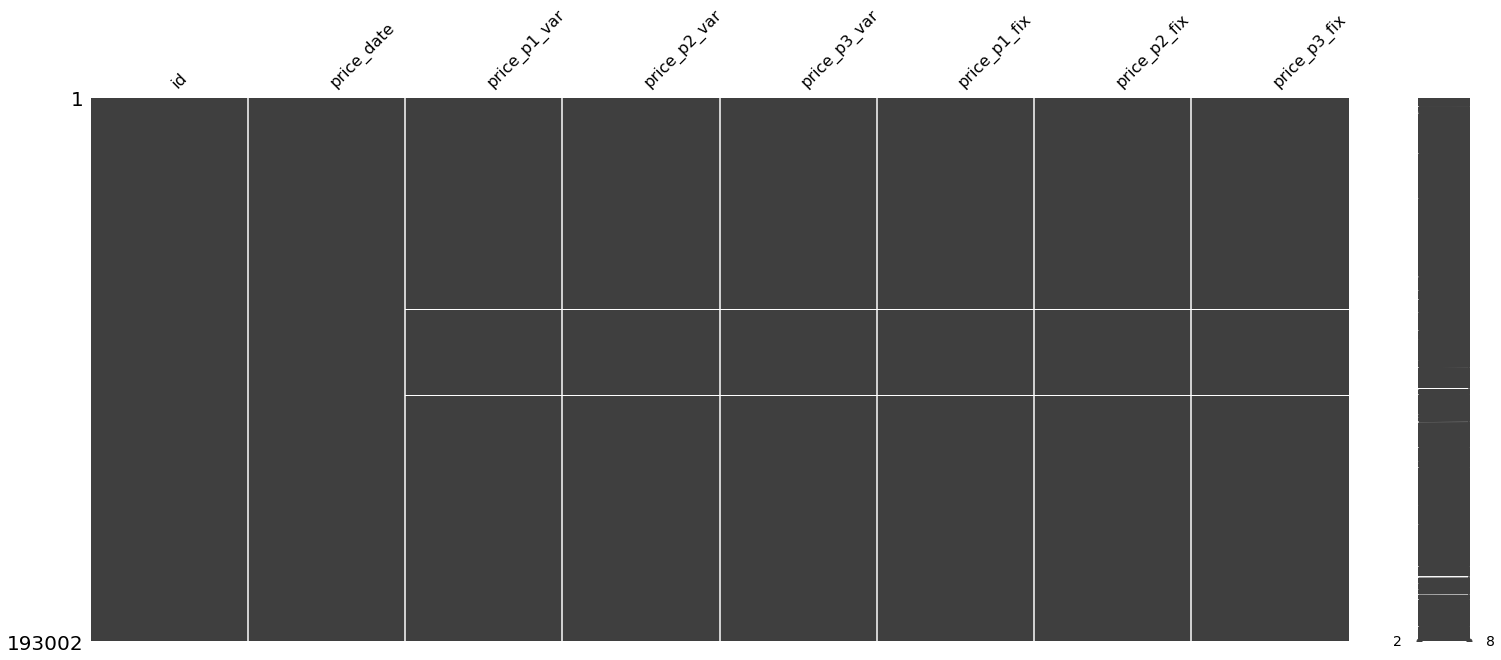

In [39]:
msno.matrix(df_hist.sort_values(['id','price_date']))

<AxesSubplot:>

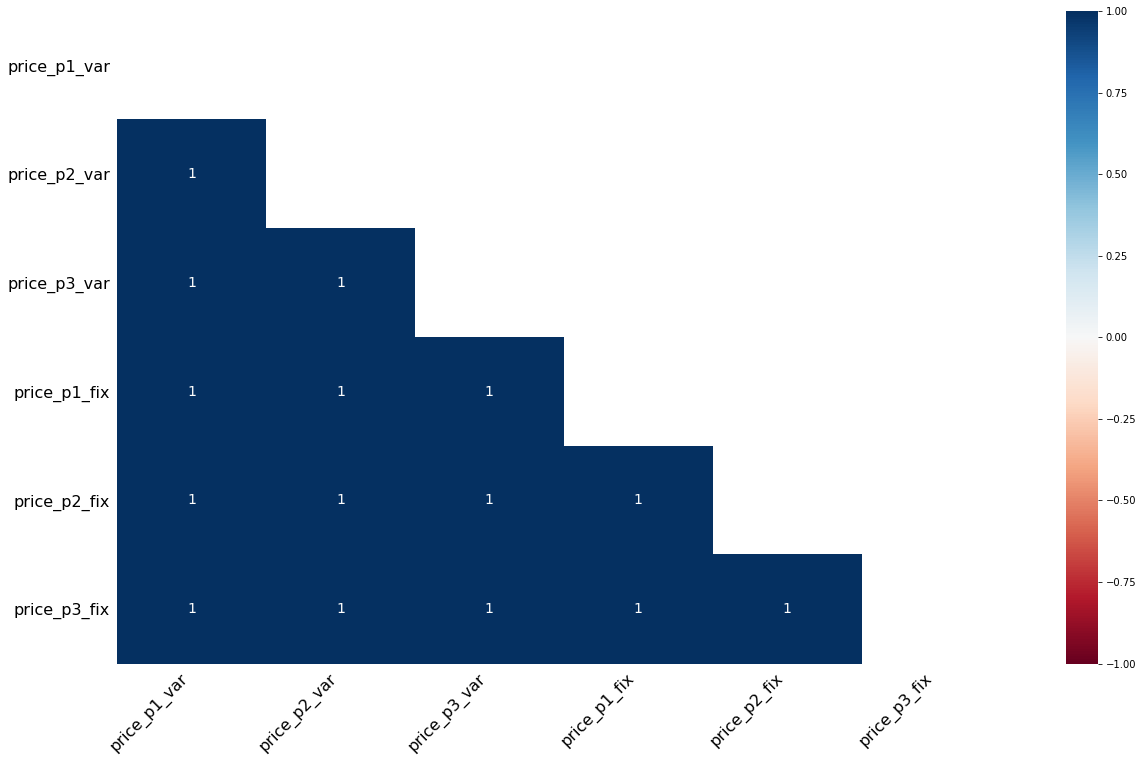

In [40]:
msno.heatmap(df_hist)

In [42]:
df_hist.corr()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_p1_var,1.000000,-0.329950,-0.595257,0.416443,-0.630465,-0.572522
price_p2_var,-0.329950,1.000000,0.828230,-0.099764,0.802757,0.814439
price_p3_var,-0.595257,0.828230,1.000000,-0.137346,0.973831,0.979617
price_p1_fix,0.416443,-0.099764,-0.137346,1.000000,0.000941,-0.251511
price_p2_fix,-0.630465,0.802757,0.973831,0.000941,1.000000,0.926955
price_p3_fix,-0.572522,0.814439,0.979617,-0.251511,0.926955,1.000000


In [46]:
ind_na = df_hist[df_hist.isnull().any(axis=1)].index.values.tolist()

In [47]:
df_hist.iloc[ind_na,:]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_hist_ff_merged = df_hist.merge(right=df_out,on=['id'])
df_hist_ff_merged.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


<AxesSubplot:>

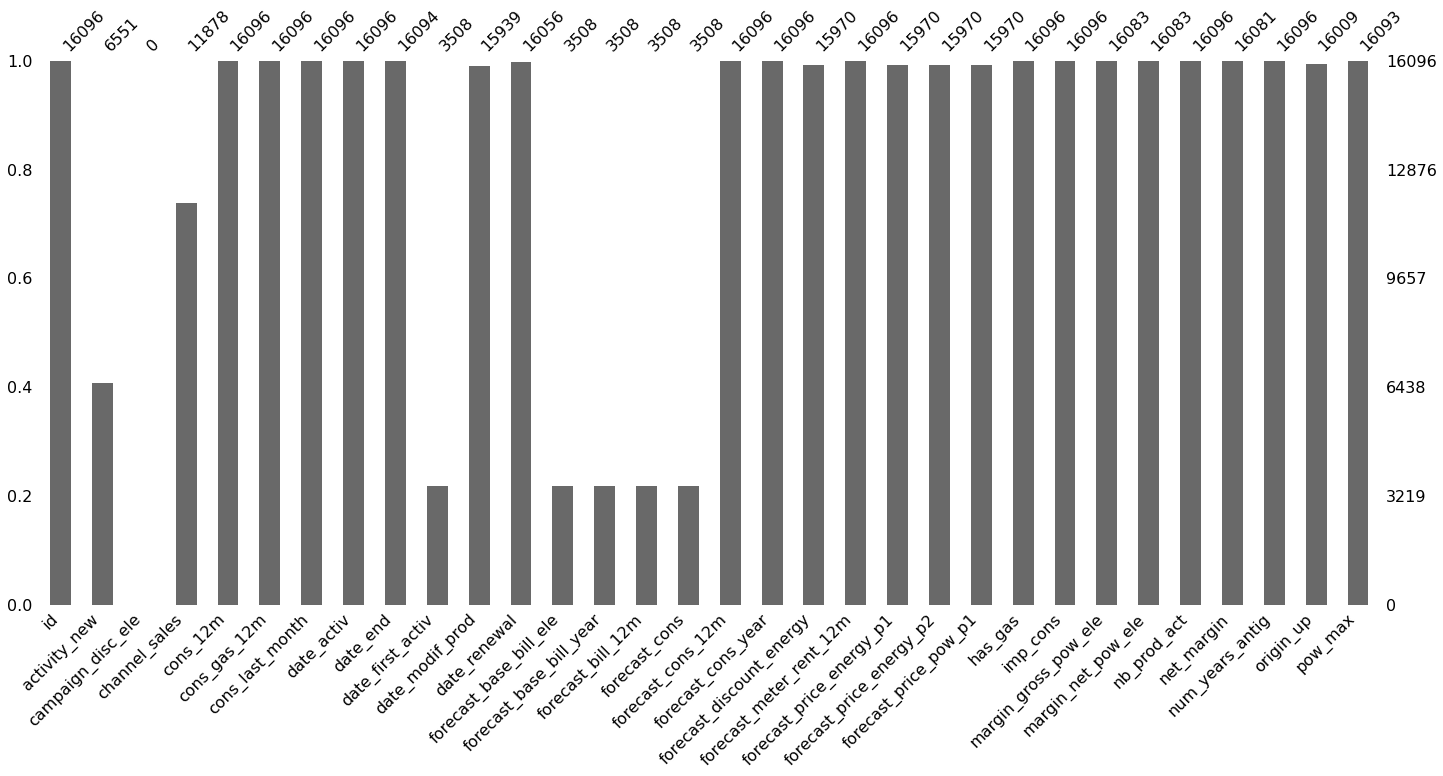

In [53]:
msno.bar(df_main)

<AxesSubplot:>

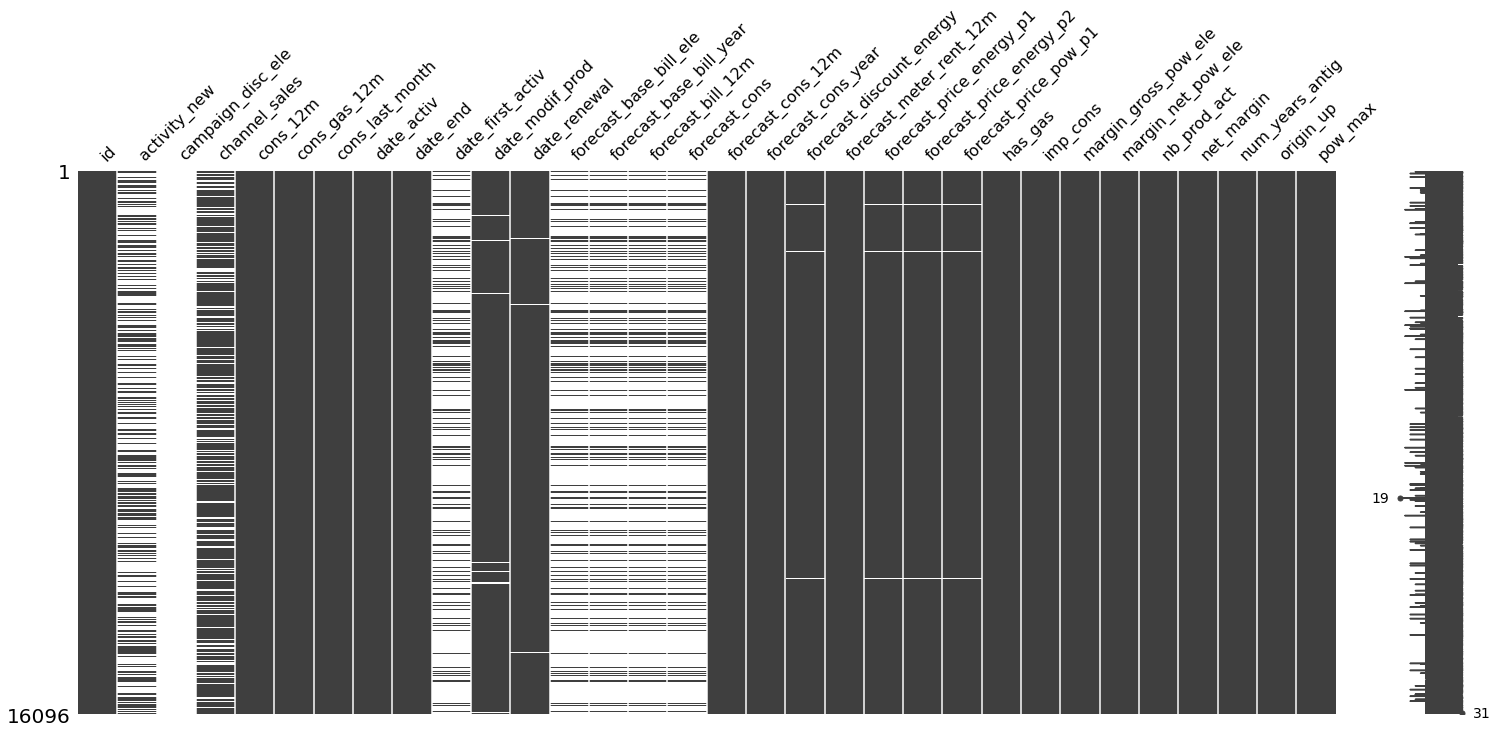

In [54]:
msno.matrix(df_main)

<AxesSubplot:>

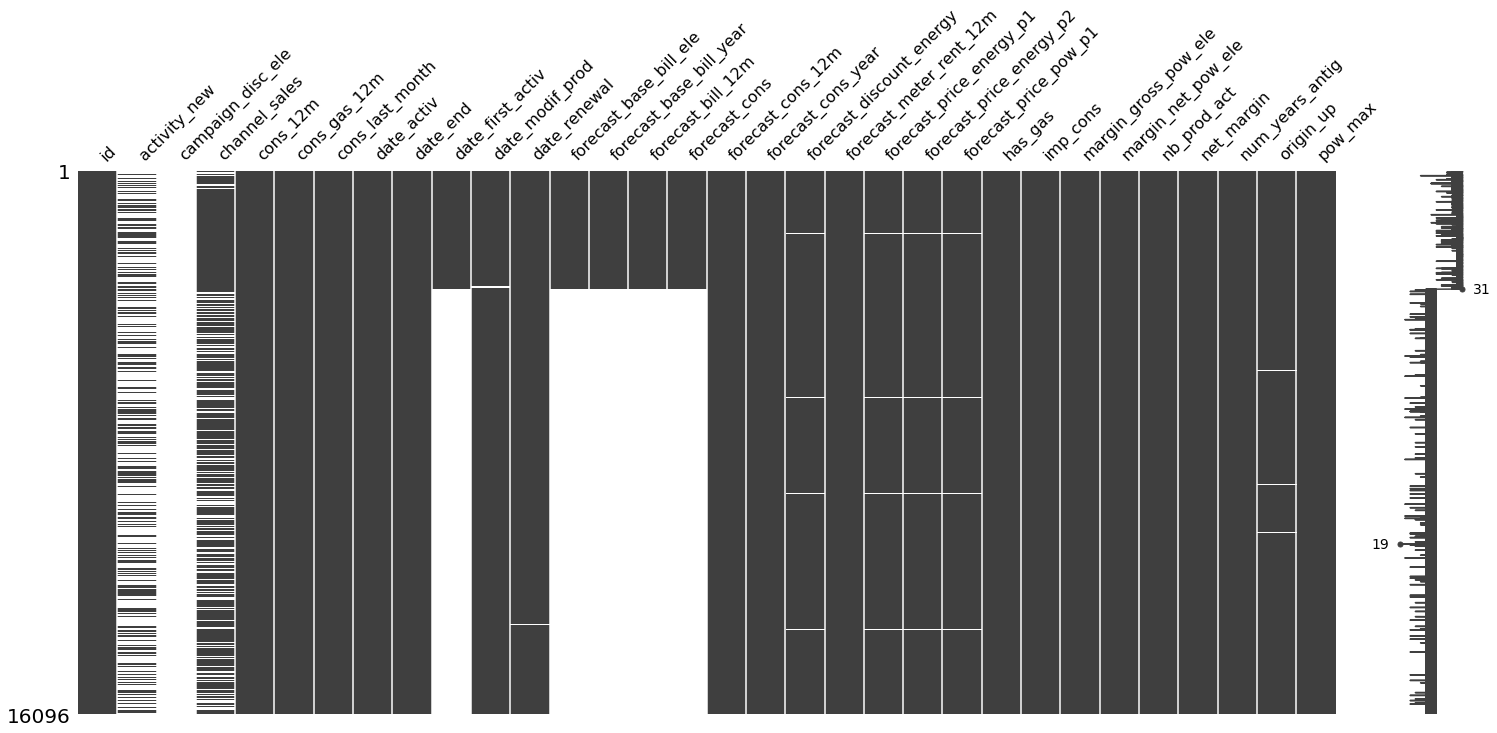

In [55]:
msno.matrix(df_main.sort_values('date_first_activ'))

<AxesSubplot:>

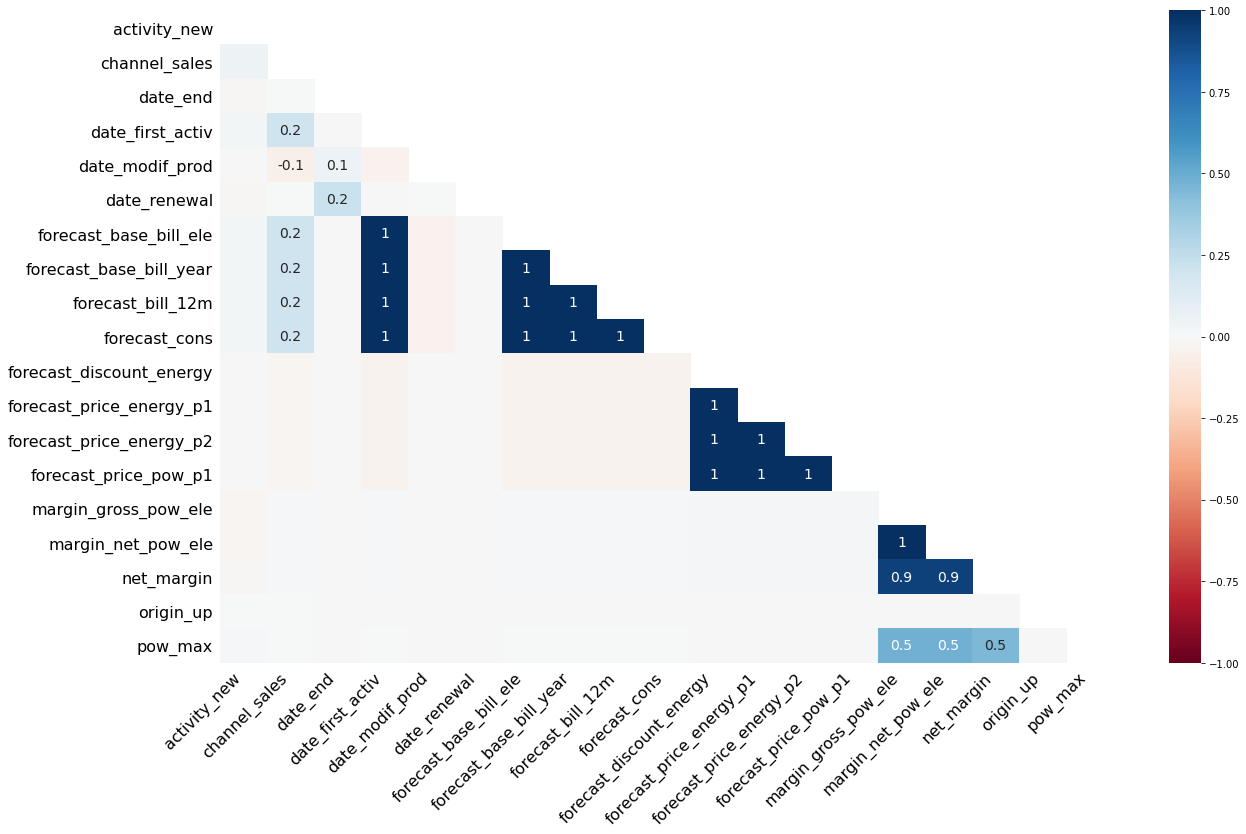

In [56]:
msno.heatmap(df_main)

<AxesSubplot:>

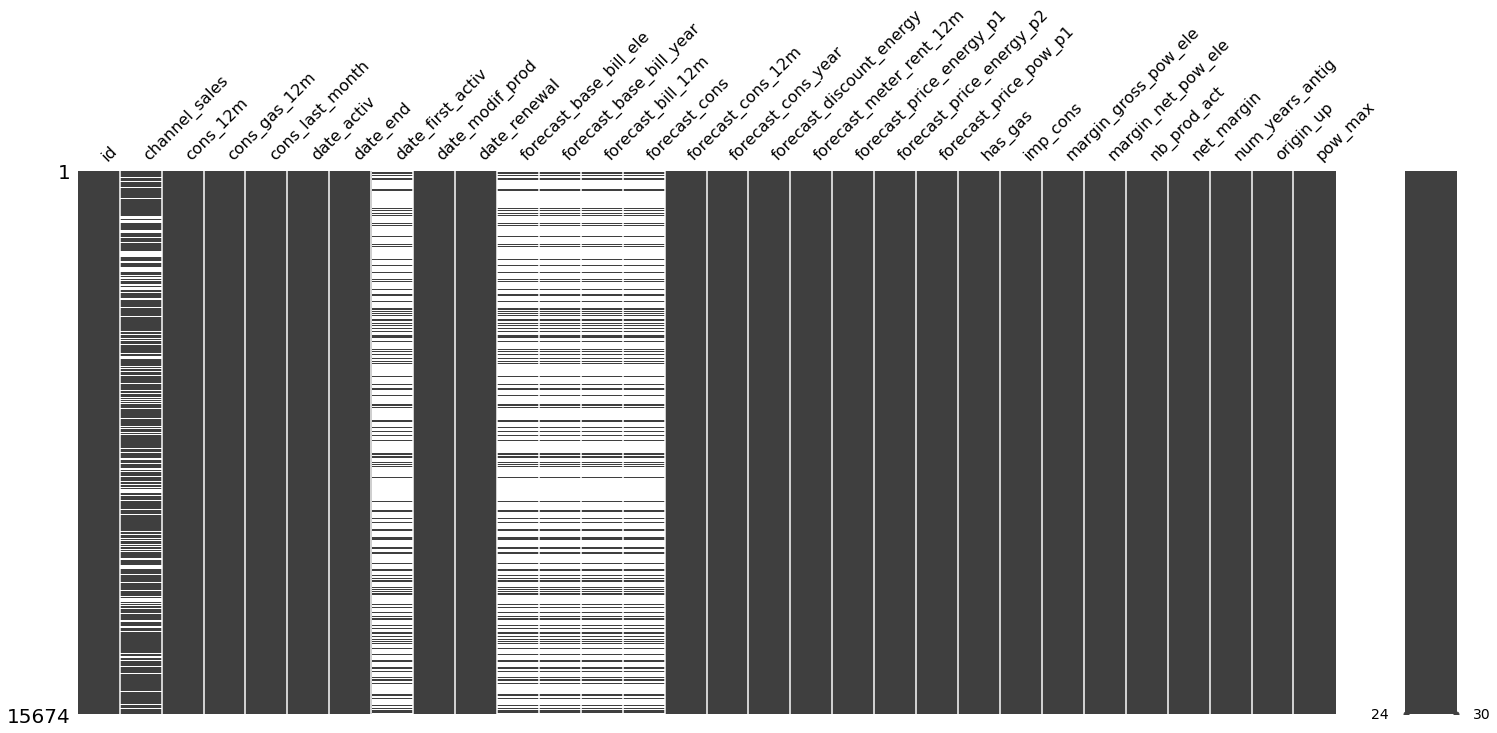

In [57]:
df_main = df_main.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)


brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
df_main.dropna(subset=brush, how='any',inplace=True)

msno.matrix(df_main)

In [60]:
incomplete_cols = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']

complete_cols = [column_name for column_name in df_main.columns 
                 if column_name not in incomplete_cols]

pco_main_cc = df_main[complete_cols]

# Fix negative numeric variables
numeric = [column_name for column_name in df_main.columns
           if df_main[column_name].dtype == 'float64' 
           or df_main[column_name].dtype == 'int64']

# Overwrite positive values on negative values
df_main[numeric] = df_main[numeric].apply(abs)

# Describe
df_main.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,3368.000000,3368.000000,3368.000000,3368.000000,15674.000000,15674.000000,15674.000000,...,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,335.689941,335.689941,3847.600625,206.082509,2359.676441,1911.698354,0.976139,...,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,647.533084,647.533084,5395.496233,452.670976,3979.605687,5224.813531,5.124103,...,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1157.315000,0.000000,514.045000,0.000000,0.000000,...,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,163.870000,163.870000,2204.835000,43.125000,1178.970000,382.000000,0.000000,...,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,396.512500,396.512500,4254.197500,228.510000,2677.220000,1994.750000,0.000000,...,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,...,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [62]:
df_main['has_gas'] = df_main['has_gas'].replace({'t':'Yes','f':'No'})


df_main = df_main.merge(right=df_out,on=['id'])


df_main['churn'] = df_main['churn'].replace({1:'Churned',0:'Stayed'})

<ipython-input-64-c16160af4a40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_tenure['z_score'] = list(abs_tenure_zscores)


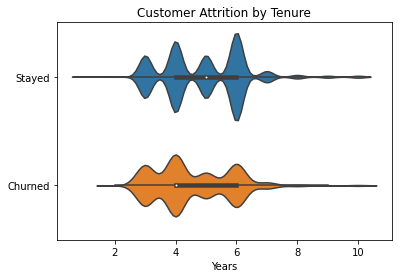

In [64]:
tenure_zcores = zscore(a=df_main['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = df_main[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()